**Importing Libraries**

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Loading Dataset**

In [102]:
file_name = ("https://raw.githubusercontent.com/SUKHMAN-SINGH-1612/Data-Science-Projects/refs/heads/main/E-Commerce%20Product%20Delivery%20Prediction/E_Commerce.csv")
df = pd.read_csv(file_name)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


**Analysis of Data**

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [104]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [105]:
df.duplicated().sum()

0

In [106]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


**EDA**

<Axes: xlabel='Warehouse_block', ylabel='count'>

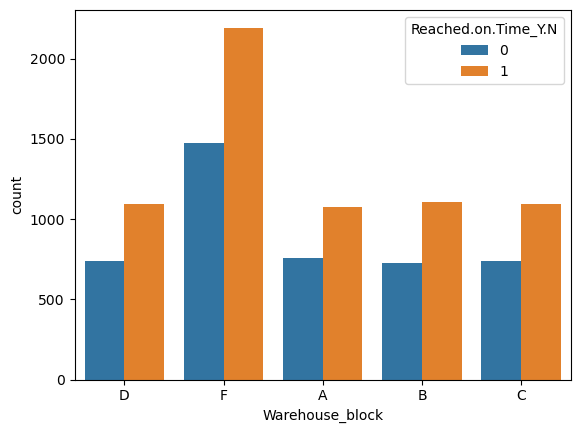

In [107]:
sns.countplot(x = 'Warehouse_block', hue = 'Reached.on.Time_Y.N',data = df)

<Axes: xlabel='Mode_of_Shipment', ylabel='count'>

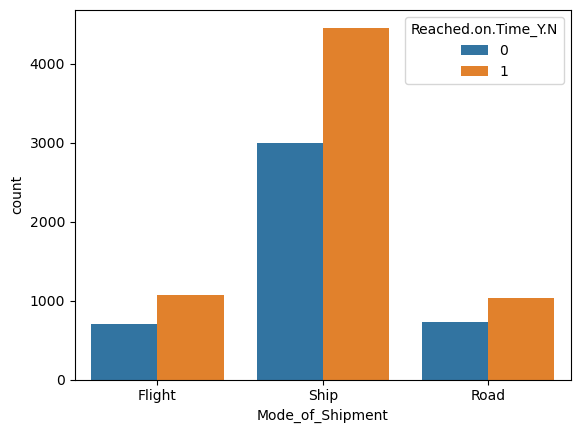

In [108]:
sns.countplot(x = 'Mode_of_Shipment', hue = 'Reached.on.Time_Y.N',data = df)

<Axes: xlabel='Customer_care_calls', ylabel='count'>

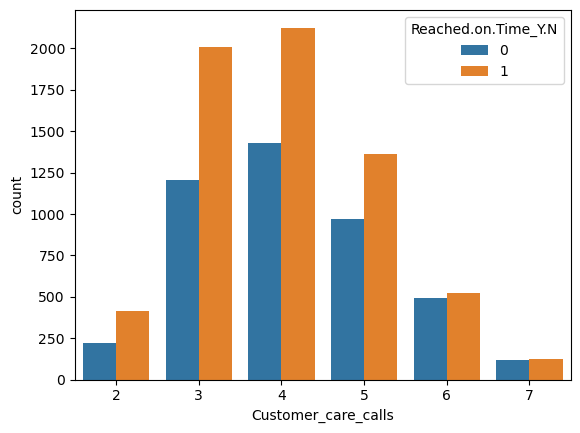

In [109]:
sns.countplot(x = 'Customer_care_calls',hue = 'Reached.on.Time_Y.N',data = df)

<Axes: xlabel='Customer_rating', ylabel='count'>

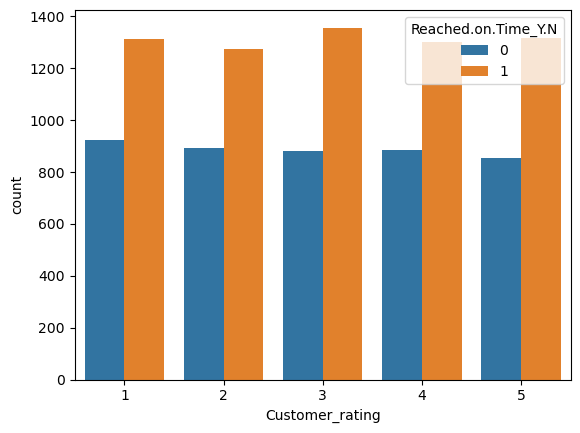

In [110]:
sns.countplot(x ='Customer_rating', hue = 'Reached.on.Time_Y.N',data = df)

<Axes: xlabel='Gender', ylabel='count'>

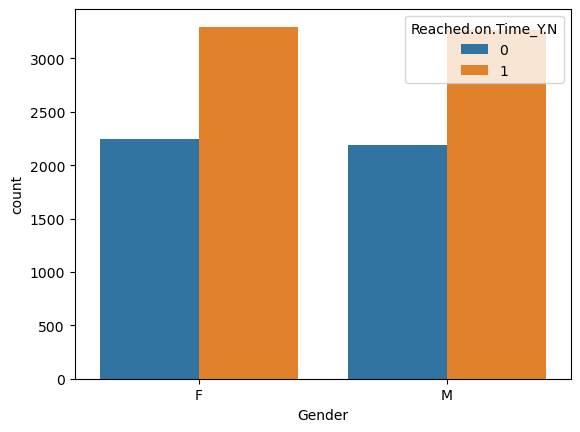

In [111]:
sns.countplot(x ='Gender', hue = 'Reached.on.Time_Y.N',data = df)

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='count'>

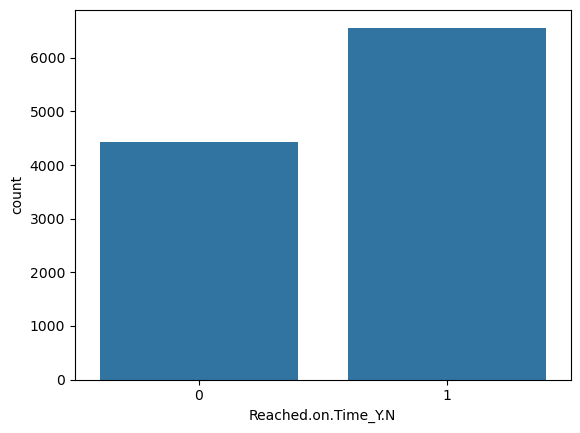

In [112]:
sns.countplot(x = 'Reached.on.Time_Y.N', data = df)

**Converting categorical column into numerical column.**

In [113]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for column in df.columns:
    df[column] = LE.fit_transform(df[column])

In [182]:
final_res = []

In [114]:
X = df.drop(['Reached.on.Time_Y.N'],axis =1)
y = df['Reached.on.Time_Y.N']

In [115]:
# splitting the data as train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8799, 11) (2200, 11) (8799,) (2200,)


**Modelling**

In [138]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [140]:
y_pred = LR.predict(x_test)

In [184]:
from sklearn.metrics import accuracy_score
acc_LR = accuracy_score(y_test,y_pred)
acc_LR
final_res.append(acc_LR)

In [146]:
from sklearn.ensemble import RandomForestClassifier
RDC = RandomForestClassifier()
RDC.fit(x_train,y_train)

RandomForestClassifier()

In [148]:
y_pred1 = RDC.predict(x_test)

In [186]:
acc_RDC = accuracy_score(y_test,y_pred1)
acc_RDC
final_res.append(acc_RDC)

In [152]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [154]:
y_pred2 = DTC.predict(x_test)

In [188]:
acc_DTC = accuracy_score(y_test,y_pred2)
acc_DTC
final_res.append(acc_DTC)

In [158]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [160]:
y_pred3 = KNN.predict(x_test)

In [190]:
acc_KNN = accuracy_score(y_test,y_pred3)
acc_KNN
final_res.append(acc_KNN)

In [164]:
from sklearn.svm import SVC
SV = SVC()
SV.fit(x_train,y_train)

SVC()

In [166]:
y_pred4 = SV.predict(x_test)

In [192]:
acc_SV = accuracy_score(y_test,y_pred4)
acc_SV
final_res.append(acc_SV)

In [170]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [172]:
y_pred5 = GBC.predict(x_test)

In [194]:
acc_GBC = accuracy_score(y_test,y_pred5)
acc_GBC
final_res.append(acc_GBC)

In [176]:
from xgboost import XGBClassifier
XG = XGBClassifier()
XG.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [178]:
y_pred6 = XG.predict(x_test)

In [196]:
acc_XG = accuracy_score(y_test,y_pred6)
acc_XG
final_res.append(acc_XG)

**Conclusion**

In [198]:
final = np.array(final_res)
result = final.reshape(-1,1)
column = ['Accuracy_score']
Index = ['Logistic Regression','Random Forest','Decision Tree','KNN','Support Vector Machine','Gradient Boosting','XG Boost']
final_result = pd.DataFrame(result,columns = column,index = Index)
final_result

,Accuracy_score
Logistic Regression,0.659091
Random Forest,0.670455
Decision Tree,0.643636
KNN,0.655455
Support Vector Machine,0.690455
Gradient Boosting,0.683636
XG Boost,0.664091


Text(0, 0.5, 'Accuracy')

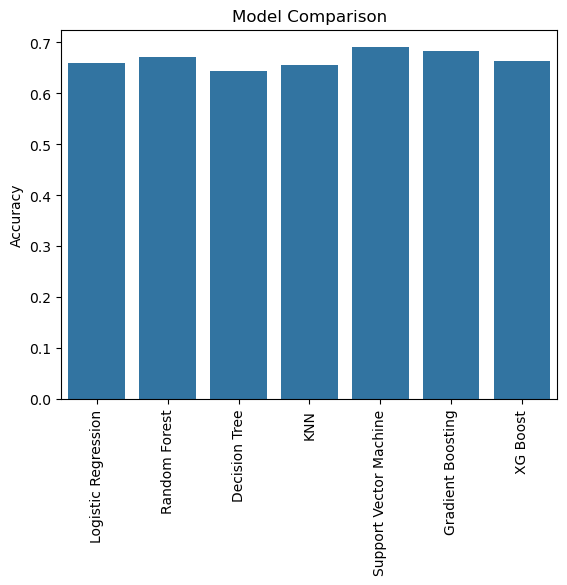

In [206]:
models = ['Logistic Regression','Random Forest','Decision Tree','KNN','Support Vector Machine','Gradient Boosting','XG Boost']
accuracy = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2), accuracy_score(y_test, y_pred3),accuracy_score(y_test, y_pred4),accuracy_score(y_test, y_pred5),accuracy_score(y_test, y_pred6)]
sns.barplot(x=models, y=accuracy).set_title('Model Comparison')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

**Support Vector Machine is giving the good accuracy Score of 0.690, so Support Vector Machine is the best model for E-Commerce Product Delivery Prediction**